# Importing required Libraries and the Dataset.

In [ ]:
import numpy as np
np.set_printoptions(legacy='1.25')
import pandas as pd
from time import time
from IPython.display import display # Allows use of Display() for Dataframes.

# Import supplementary visualization code visuals.py
import visuals as vs

%matplotlib inline

data = pd.read_csv("/train.csv")
# data = pd.read_csv("/content/Autism-Child-Data.csv")
test_data = pd.read_csv("/test.csv")
display(data.head(5))

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [1193]:
# Total number of records:
n_records = len(data.index)

# Total number of records with ASD
n_asd_yes = len(data[data['autism'] == 'yes'])

# Total number of records without ASD
n_asd_no = len(data[data['autism'] == 'no'])

# Percentage of individuals with ASD
yes_percentage = float((n_asd_yes) / n_records * 100)

# Printing the outputs
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')
print("Percentage of individuals with ASD : {:.2f}%".format(yes_percentage))

Total number of records  : 800
Number of individuals with ASD : 131
Number of individuals without ASD : 669
Percentage of individuals with ASD : 16.38%


## Featureset Exploration

In [1194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [1195]:
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


## Preparing the Data

In [1196]:
data.isna().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


##### Dropping missing values

In [1197]:
data.dropna(inplace=True)
data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [1198]:
# After Data Cleaning

# Total number of records:
n_records = len(data.index)

# Total number of records with ASD
n_asd_yes = len(data[data['autism'] == 'yes'])

# Total number of records without ASD
n_asd_no = len(data[data['autism'] == 'no'])

# Printing the outputs
print("AFTER REMOVING NULL VALUES : ")
print(f'Total number of records  : {n_records}')
print(f'Number of individuals with ASD : {n_asd_yes}')
print(f'Number of individuals without ASD : {n_asd_no}')


AFTER REMOVING NULL VALUES : 
Total number of records  : 800
Number of individuals with ASD : 131
Number of individuals without ASD : 669


### Visualizations with Seaborn

In [1199]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

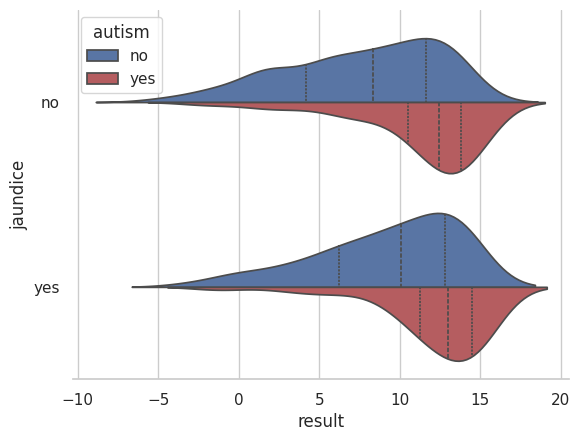

In [1200]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jaundice", hue="autism", data=data, split=True,inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

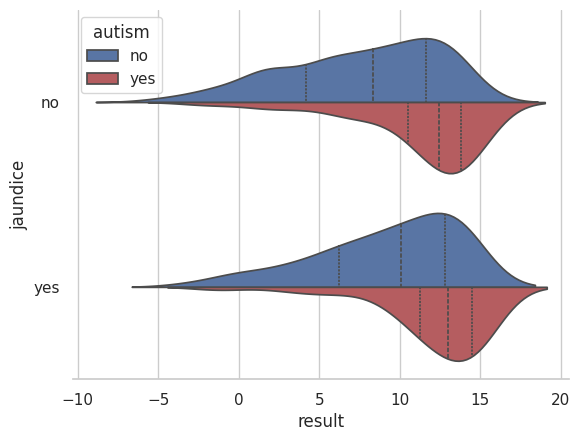

In [1201]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="jaundice", hue="autism", data=data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

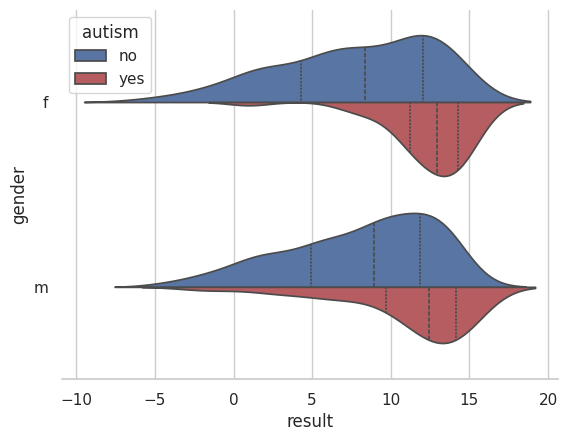

In [1202]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="result", y="gender", hue="autism", data=data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

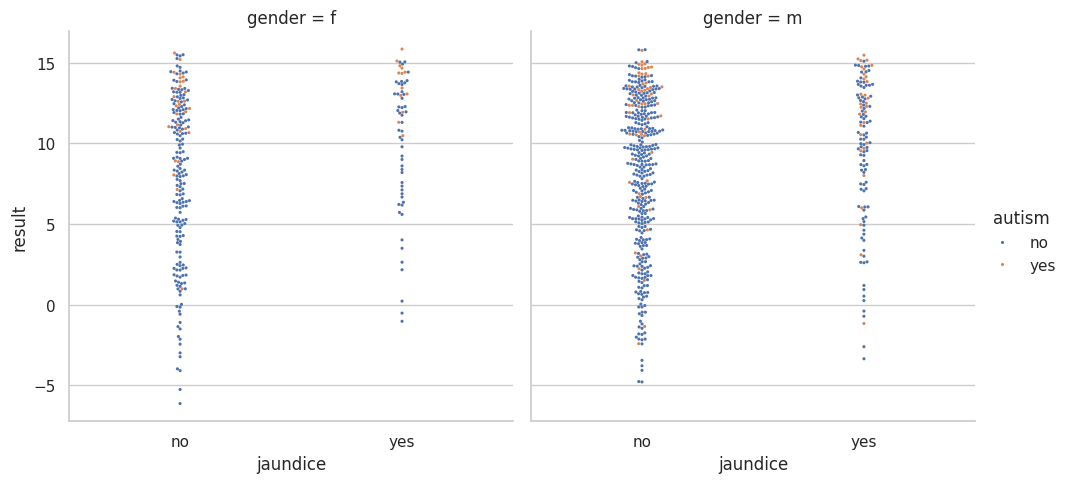

In [1203]:
sns.catplot(x="jaundice", y="result", hue="autism", s = 5, col="gender", data=data, kind="swarm");

Convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (autism).

In [1204]:
data_raw = data['autism']
test_data_raw = test_data['autism']
features_raw = data[['age', 'gender', 'ethnicity', 'jaundice', 'autism', 'contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]
features_raw = features_raw.replace('?', np.nan)
data_raw = data_raw[features_raw.index]
# features_raw.dropna(subset=num, inplace=True)
test_features_raw = test_data[['age', 'gender', 'ethnicity', 'jaundice', 'autism','contry_of_res', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Data Preprocessing : using MinMaxScaler()

In [1205]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num = ['age','result']
features_minmax_transform = pd.DataFrame(data = features_raw)
test_features_minmax_transform = pd.DataFrame(data = test_features_raw)
features_minmax_transform[num] = scaler.fit_transform(features_raw[num])
test_features_minmax_transform[num] = scaler.fit_transform(test_features_raw[num])

### One-Hot Encoding on features_minmax_transform

In [1206]:
features_final = pd.get_dummies(features_minmax_transform)
features_test = pd.get_dummies(test_features_minmax_transform)

### Encode all classes data to numerical values

In [1207]:
data_classes = data_raw.apply(lambda x : 1 if x == 'yes' else 0)
test_data_classes = test_data_raw.apply(lambda x : 1 if x == 'yes' else 0)

In [1208]:
def add_missing_columns(df1, df2):
    """
    Adds columns from df1 to df2 that are not present in df2, and fills the new columns with 0.

    Args:
        df1 (pd.DataFrame): The reference DataFrame.
        df2 (pd.DataFrame): The DataFrame to which columns will be added.

    Returns:
        pd.DataFrame: A new DataFrame based on df2, with added columns (if any).
    """
    # Find columns in df1 that are not in df2
    missing_cols = set(df1.columns) - set(df2.columns)

    # Add the missing columns to df2, filled with 0
    for col in missing_cols:
        df2[col] = 0

    # Ensure the columns in df2 are in the same order as in df1
    df2 = df2[df1.columns]

    return df2

In [1209]:
# features_test = add_missing_columns(features_final, features_test)
features_final, features_test = features_final.align(features_test, join='inner', axis=1, fill_value=0)

In [1210]:
encoded = list(features_final.columns)
encoded_test = list(features_test.columns)
print("{} total features after one-hot encoding".format(len(encoded)))
print("{} total features after one-hot encoding".format(len(encoded_test)))
print(encoded)
print(encoded_test)

65 total features after one-hot encoding
65 total features after one-hot encoding
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Middle Eastern ', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_South Asian', 'ethnicity_Turkish', 'ethnicity_White-European', 'jaundice_no', 'jaundice_yes', 'autism_no', 'autism_yes', 'contry_of_res_Afghanistan', 'contry_of_res_Aruba', 'contry_of_res_Australia', 'contry_of_res_Austria', 'contry_of_res_Azerbaijan', 'contry_of_res_Bahamas', 'contry_of_res_Bolivia', 'contry_of_res_Burundi', 'contry_of_res_Canada', 'contry_of_res_Czech Republic', 'contry_of_res_Egypt', 'contry_of_res_France', 'contry_of_res_Germany', 'contry_of_res_Iceland', 'contry_of_res_India', 'contry_of_res_Iran', 'contry_of_res_Ireland', 'contry_of_res_Italy', 'contry_of_res_Jord

Text(0, 0.5, 'Frequency')

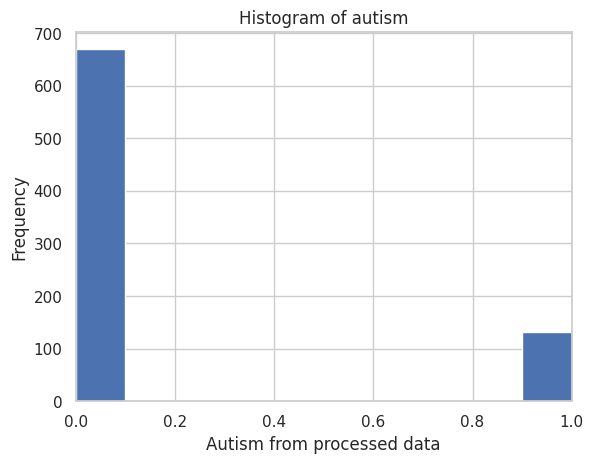

In [1211]:
plt.hist(data_classes, bins=10)
plt.xlim(0,1)
plt.title('Histogram of autism')
plt.xlabel('Autism from processed data')
plt.ylabel('Frequency')

## Shuffle and Split the data
All the categorical variables have been converted to numerical variables and have been normalized, we split the data into train and test set, test set will be 20% of the total data.

In [1212]:
# from sklearn.model_selection import train_test_split
np.random.seed()
# X_train = features_final
# y_train = data_classes # Or however your target is encoded

# X_test = features_test
# y_test = test_data_classes   # Or however your target is encoded
X_train, X_test, y_train, y_test = train_test_split(features_final,data_classes,test_size=0.2, random_state=1)
print("Train set has {} enteries.".format(X_train.shape[0]))
print("Test set has {} enteries.".format(X_test.shape[0]))

Train set has 640 enteries.
Test set has 160 enteries.


## Models :

### 1. Decision Tress

In [1213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_dt*100}%\n")
print(classification_report(y_test, y_pred))


Accuracy: 100.0%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        31

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



### 2. Random Forest

In [1214]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters here
rf_model.fit(X_train.values, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test.values)

# Evaluate the model
accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf*100}%\n")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 100.0%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        31

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



### 3. Support Vector Machine

In [1215]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize the SVM classifier
svm_model = SVC(kernel='poly') # You can experiment with different kernels (e.g., 'rbf', 'poly','linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_svm = svm_model.score(X_test, y_test)
print(f"Accuracy: {accuracy_svm*100}%\n")

# Generate classification report
print(classification_report(y_test, y_pred))


Accuracy: 99.375%

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       129
           1       1.00      0.97      0.98        31

    accuracy                           0.99       160
   macro avg       1.00      0.98      0.99       160
weighted avg       0.99      0.99      0.99       160



### 4. K-Nearest-Neighbors(KNN)

In [1216]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Find optimal k value using cross-validation (optional)
k_values = range(1, 30)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracies.append(scores.mean())

optimal_k = k_values[np.argmax(accuracies)]
print("Optimal k:", optimal_k)

# Initialize KNN with the optimal k or a chosen k
knn_model = KNeighborsClassifier(n_neighbors=5) # You can change the n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn*100,"\b%\n")

# Print classification report (precision, recall, F1-score)
print(classification_report(y_test, y_pred))


Optimal k: 3
Accuracy: 98.125 %

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       129
           1       1.00      0.90      0.95        31

    accuracy                           0.98       160
   macro avg       0.99      0.95      0.97       160
weighted avg       0.98      0.98      0.98       160



### 5. Naive Bayes

In [1217]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Initialize and train the Gaussian Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train.values, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test.values)

# Calculate accuracy
accuracy_nb = nb_model.score(X_test.values, y_test)
print(f"Accuracy of Naive Bayes: {accuracy_nb * 100:.2f}%\n")

# Evaluate the model using classification_report
print(classification_report(y_test, y_pred_nb))


Accuracy of Naive Bayes: 98.75%

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       129
           1       1.00      0.94      0.97        31

    accuracy                           0.99       160
   macro avg       0.99      0.97      0.98       160
weighted avg       0.99      0.99      0.99       160



### 6. Logistic Regression

In [1218]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy_lr*100}%\n")

# Evaluate the model
print(classification_report(y_test, y_pred))


AdaBoost Accuracy: 100.0%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        31

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



###7. ADA Boost (AB)

In [1219]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the AdaBoost classifier
ada_boost_model = AdaBoostClassifier(n_estimators=50, random_state=1)
ada_boost_model.fit(X_train.values, y_train)

# Make predictions on the test set
y_pred = ada_boost_model.predict(X_test.values)

# Evaluate the model
accuracy_ab = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy_ab*100}%\n")

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


AdaBoost Accuracy: 100.0%

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        31

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160



###8. Linear Discriminant Analysis (LDA)

In [1220]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# LDA Model
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train.values, y_train)
y_pred = lda_model.predict(X_test.values)

# Evaluate the model
accuracy_lda = accuracy_score(y_test, y_pred)
print(f"LDA Accuracy: {accuracy_lda*100}%\n")

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))


LDA Accuracy: 80.0%

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       129
           1       0.48      0.39      0.43        31

    accuracy                           0.80       160
   macro avg       0.67      0.64      0.65       160
weighted avg       0.79      0.80      0.79       160



## Model Tuning

In [1221]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

# Create a dictionary to store the accuracy of each model
model_accuracies = {}

# Decision Tree
model_accuracies["Decision Tree"] = accuracy_dt

# Random Forest
model_accuracies["Random Forest"] = accuracy_rf

# Support Vector Machine
model_accuracies["SVM"] = accuracy_svm

# K-Nearest Neighbors
model_accuracies["KNN"] = accuracy_knn

# Naive Bayes
model_accuracies["Naive Bayes"] = accuracy_nb

# Logistic Regression
model_accuracies["Logistic Regression"] = accuracy_lr

# AdaBoost
model_accuracies["AdaBoost"] = accuracy_ab

# LDA
model_accuracies["LDA"] = accuracy_lda

# Print the accuracy of each model
for model_name, accuracy in model_accuracies.items():
    print(f"{model_name} Accuracy: {accuracy*100:.2f}%")


Decision Tree Accuracy: 100.00%
Random Forest Accuracy: 100.00%
SVM Accuracy: 99.38%
KNN Accuracy: 98.12%
Naive Bayes Accuracy: 98.75%
Logistic Regression Accuracy: 100.00%
AdaBoost Accuracy: 100.00%
LDA Accuracy: 80.00%
